IMPORTING THE DEOENDENCIES


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy import concatenate
from math import sqrt

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!pip install vaderSentiment

In [ ]:
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
from textblob import TextBlob

In [ ]:
!pip install nltk
!python -m nltk.downloader stopwords

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

IMPORTING THE DATASET

##### HEADLINE DATASET

In [ ]:
df1 = pd.read_csv('/india-news-headlines 1.csv')

In [ ]:
df1.shape

(90873, 4)

In [ ]:
df1.head()

,Date,category,Unnamed: 2
0,20200101,life-style.events,Happy New Year 2020: Images; Quotes; Wishes; M...
1,20200101,city.bhubaneswar,Bone-clling cold wavecontinues to sweep state
2,20200101,city.hyderabad,T gained 163 sq km forest cover
3,20200101,city.hyderabad,Draft electoral rolls published
4,20200101,city.koc,Invasive species increasing in Kerala's core f...


STOCK PRICES DATASET

In [ ]:
df2 = pd.read_csv('/BSESN (1).csv')

In [ ]:
df2.shape

(252, 7)

In [ ]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-14,41883.089844,41994.261719,41770.898438,41952.628906,41952.628906,14100.0
1,2020-01-15,41969.859375,41969.859375,41648.109375,41872.730469,41872.730469,6100.0
2,2020-01-16,41924.738281,42059.449219,41812.281250,41932.558594,41932.558594,6600.0
3,2020-01-17,41929.019531,42063.929688,41850.289063,41945.371094,41945.371094,9500.0
4,2020-01-20,42263.000000,42273.871094,41503.371094,41528.910156,41528.910156,7500.0


#### DATA CLEANING

In [ ]:
df1.drop('News', axis = 1, inplace = True)

In [ ]:
df1.rename(columns = {'Unnamed: 2':'News'}, inplace = True)

In [ ]:
# Droppingthe Category column as we don't require this for our analysis.
df1.drop('category', axis = 1,inplace  =True)
# Converting 'Date' columns from both our dataframes to type datetime
df1['Date'] = pd.to_datetime(df1['Date'],format= '%Y%m%d')
df2['Date'] = pd.to_datetime(df2['Date'])
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-14,41883.089844,41994.261719,41770.898438,41952.628906,41952.628906,14100.0
1,2020-01-15,41969.859375,41969.859375,41648.109375,41872.730469,41872.730469,6100.0
2,2020-01-16,41924.738281,42059.449219,41812.281250,41932.558594,41932.558594,6600.0
3,2020-01-17,41929.019531,42063.929688,41850.289063,41945.371094,41945.371094,9500.0
4,2020-01-20,42263.000000,42273.871094,41503.371094,41528.910156,41528.910156,7500.0
...,...,...,...,...,...,...,...
247,2021-01-08,48464.910156,48854.339844,48365.578125,48782.511719,48782.511719,22200.0
248,2021-01-11,49252.308594,49303.789063,48956.378906,49269.320313,49269.320313,21200.0
249,2021-01-12,49228.261719,49569.140625,49079.570313,49517.109375,49517.109375,12700.0
250,2021-01-13,49763.929688,49795.191406,49073.851563,49492.320313,49492.320313,27200.0


In [ ]:
df1

,Date,News
0,2020-01-01,Happy New Year 2020: Images; Quotes; Wishes; M...
1,2020-01-01,Bone-clling cold wavecontinues to sweep state
2,2020-01-01,T gained 163 sq km forest cover
3,2020-01-01,Draft electoral rolls published
4,2020-01-01,Invasive species increasing in Kerala's core f...
...,...,...
90868,2020-06-30,why tiktok removed 1 65 crore videos in india
90869,2020-06-30,apurva asrani calls alia bhatts mother soni ra...
90870,2020-06-30,kangana ranaut gets a doll version of herself ...
90871,2020-06-30,meezaan jaffrey reminisces s cldhood days with...


In [ ]:
df1['News'] = df1['News'].astype(str)
df1['News'] = df1.groupby(['Date']).transform(lambda x : ' '.join(x))
df1 = df1.drop_duplicates()
df1.reset_index(inplace = True, drop = True)
df1

,Date,News
0,2020-01-01,Happy New Year 2020: Images; Quotes; Wishes; M...
1,2020-01-02,Horoscope Today; 02 January 2020: Read predict...
2,2020-01-03,Bank Holidays in 2020 Mazya Navryac Bayko upda...
3,2020-01-04,Mamta Mohandas plays a nurse in Lalbagh Tolly ...
4,2020-01-05,Homing in on 2020 Beauty in blue Live it up in...
...,...,...
177,2020-06-26,Containment zone residents slam gh prices char...
178,2020-06-27,like me i wont let you have a toxic relationsp...
179,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
180,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


##### REMOVING THE STOPWORDS.
##### STORING THE PROCESSED TEXT IN A LIST 'C'.

In [ ]:
c = []

for i in range(0,len(df1['News'])):
    news = re.sub('[^a-zA-Z]',' ',df1['News'][i])
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
    print(i)
    news=' '.join(news)
    c.append(news)
    # news = [word for word in news if word not in set(stopwords.words('english'))]
    # print(news)
    # news = []
    # for w in news: news.append(ps.stem(w))
    # print(news)
    # news=' '.join(news)
    # print(news)
    # c.append(news)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181


##### SUBJECTIVITY AND POLARITY
#### POLARITY: INDICATES HOW POSITIVE OR NEGATIVE THE TEXT IS.
#### SUBJECTIVITY: INDICATES HOW SUBJECTIVE OR OBJECTIVE THE TEXT IS.

In [ ]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity


#Adding subjectivity and polarity columns
df1['Subjectivity'] = df1['News'].apply(getSubjectivity)
df1['Polarity'] = df1['News'].apply(getPolarity)
df1

<ipython-input-108-6e3751432d1c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Subjectivity'] = df1['News'].apply(getSubjectivity)
<ipython-input-108-6e3751432d1c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Polarity'] = df1['News'].apply(getPolarity)


,Date,News,Subjectivity,Polarity
0,2020-01-01,Happy New Year 2020: Images; Quotes; Wishes; M...,0.427803,0.055353
1,2020-01-02,Horoscope Today; 02 January 2020: Read predict...,0.419805,0.086295
2,2020-01-03,Bank Holidays in 2020 Mazya Navryac Bayko upda...,0.399464,0.061539
3,2020-01-04,Mamta Mohandas plays a nurse in Lalbagh Tolly ...,0.379175,0.072151
4,2020-01-05,Homing in on 2020 Beauty in blue Live it up in...,0.375686,0.080908
...,...,...,...,...
177,2020-06-26,Containment zone residents slam gh prices char...,0.381280,0.068899
178,2020-06-27,like me i wont let you have a toxic relationsp...,0.400572,0.078694
179,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...,0.397205,0.059175
180,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...,0.399303,0.062107


##### SENTIMENT ANALYSIS

In [ ]:
#Adding sentiment score to df1
sia = SentimentIntensityAnalyzer()

df1['Compound'] = [sia.polarity_scores(v)['compound'] for v in df1['News']]
df1['Negative'] = [sia.polarity_scores(v)['neg'] for v in df1['News']]
df1['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df1['News']]
df1['Positive'] = [sia.polarity_scores(v)['pos'] for v in df1['News']]
df1

<ipython-input-109-c6b2fd7b06ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Compound'] = [sia.polarity_scores(v)['compound'] for v in df1['News']]
<ipython-input-109-c6b2fd7b06ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Negative'] = [sia.polarity_scores(v)['neg'] for v in df1['News']]
<ipython-input-109-c6b2fd7b06ff>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2020-01-01,Happy New Year 2020: Images; Quotes; Wishes; M...,0.427803,0.055353,-0.9999,0.141,0.783,0.076
1,2020-01-02,Horoscope Today; 02 January 2020: Read predict...,0.419805,0.086295,-0.9999,0.143,0.778,0.079
2,2020-01-03,Bank Holidays in 2020 Mazya Navryac Bayko upda...,0.399464,0.061539,-0.9961,0.110,0.790,0.100
3,2020-01-04,Mamta Mohandas plays a nurse in Lalbagh Tolly ...,0.379175,0.072151,-0.9998,0.141,0.774,0.084
4,2020-01-05,Homing in on 2020 Beauty in blue Live it up in...,0.375686,0.080908,-0.9999,0.145,0.787,0.068
...,...,...,...,...,...,...,...,...
177,2020-06-26,Containment zone residents slam gh prices char...,0.381280,0.068899,-0.9999,0.162,0.749,0.089
178,2020-06-27,like me i wont let you have a toxic relationsp...,0.400572,0.078694,-0.9999,0.157,0.750,0.093
179,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...,0.397205,0.059175,-0.9999,0.151,0.774,0.075
180,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...,0.399303,0.062107,-0.9999,0.145,0.770,0.086


##### MERGING BOTH THE DATASET

In [ ]:
# Merging our findings (the updated News dataframe) with the Prices dataframe
df_merge = pd.merge(df2, df1, how='inner', on='Date')
print(df1)
df_merge.drop('Date', axis = 1, inplace=True)
df_merge.drop('News', axis=1, inplace=True)
print(df_merge.columns)
print(len(df_merge))
print(len(df2))
print(len(df1))

          Date                                               News  \
0   2020-01-01  Happy New Year 2020: Images; Quotes; Wishes; M...   
1   2020-01-02  Horoscope Today; 02 January 2020: Read predict...   
2   2020-01-03  Bank Holidays in 2020 Mazya Navryac Bayko upda...   
3   2020-01-04  Mamta Mohandas plays a nurse in Lalbagh Tolly ...   
4   2020-01-05  Homing in on 2020 Beauty in blue Live it up in...   
..         ...                                                ...   
177 2020-06-26  Containment zone residents slam gh prices char...   
178 2020-06-27  like me i wont let you have a toxic relationsp...   
179 2020-06-28  Atanu Ghosh plans to rewrite old scripts to ma...   
180 2020-06-29  6 hot and stylish bikini looks of Katrina Kaif...   
181 2020-06-30  Detective Byomkesh Bakshy! Edge of Tomorrow Fi...   

     Subjectivity  Polarity  Compound  Negative  Neutral  Positive  
0        0.427803  0.055353   -0.9999     0.141    0.783     0.076  
1        0.419805  0.086295   -0.

##### GETTING OUR DATA SERIES READY FOR MULTIVARIATE TIME SERIES FORECASTING

In [ ]:

from pandas import DataFrame as df
from pandas import concat
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df3 = df(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df3.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df3.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
# scale our data for optimal performance
values = df_merge.values
print(df_merge)
print(values)
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[12,13,14,16,17,18,19,20,21,22,23]], axis=1, inplace=True)
print(reframed.columns)

             Open          High           Low         Close     Adj Close  \
0    41883.089844  41994.261719  41770.898438  41952.628906  41952.628906   
1    41969.859375  41969.859375  41648.109375  41872.730469  41872.730469   
2    41924.738281  42059.449219  41812.281250  41932.558594  41932.558594   
3    41929.019531  42063.929688  41850.289063  41945.371094  41945.371094   
4    42263.000000  42273.871094  41503.371094  41528.910156  41528.910156   
..            ...           ...           ...           ...           ...   
108  35679.738281  35706.550781  34794.929688  34868.980469  34868.980469   
109  34525.390625  35081.609375  34499.781250  34842.101563  34842.101563   
110  35144.781250  35254.878906  34910.339844  35171.269531  35171.269531   
111  34926.949219  35032.359375  34662.058594  34961.519531  34961.519531   
112  35168.300781  35233.910156  34812.800781  34915.800781  34915.800781   

      Volume  Subjectivity  Polarity  Compound  Negative  Neutral  Positive

In [ ]:
# split into train and test sets
values = reframed.values
print((values).shape)
n_train_hours = 90
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(112, 13)
(90, 1, 12) (90,) (22, 1, 12) (22,)


##### DESIGN THE NETWORK

In [ ]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)




Epoch 1/50
2/2 - 3s - loss: 0.5486 - val_loss: 0.4832 - 3s/epoch - 1s/step
Epoch 2/50
2/2 - 0s - loss: 0.5139 - val_loss: 0.4497 - 41ms/epoch - 20ms/step
Epoch 3/50
2/2 - 0s - loss: 0.4795 - val_loss: 0.4162 - 37ms/epoch - 18ms/step
Epoch 4/50
2/2 - 0s - loss: 0.4452 - val_loss: 0.3826 - 40ms/epoch - 20ms/step
Epoch 5/50
2/2 - 0s - loss: 0.4107 - val_loss: 0.3487 - 37ms/epoch - 19ms/step
Epoch 6/50
2/2 - 0s - loss: 0.3761 - val_loss: 0.3146 - 36ms/epoch - 18ms/step
Epoch 7/50
2/2 - 0s - loss: 0.3421 - val_loss: 0.2802 - 36ms/epoch - 18ms/step
Epoch 8/50
2/2 - 0s - loss: 0.3085 - val_loss: 0.2455 - 39ms/epoch - 19ms/step
Epoch 9/50
2/2 - 0s - loss: 0.2757 - val_loss: 0.2104 - 58ms/epoch - 29ms/step
Epoch 10/50
2/2 - 0s - loss: 0.2431 - val_loss: 0.1750 - 48ms/epoch - 24ms/step
Epoch 11/50
2/2 - 0s - loss: 0.2112 - val_loss: 0.1391 - 82ms/epoch - 41ms/step
Epoch 12/50
2/2 - 0s - loss: 0.1834 - val_loss: 0.1042 - 101ms/epoch - 50ms/step
Epoch 13/50
2/2 - 0s - loss: 0.1644 - val_loss: 0.07

##### PLOT HISTORY

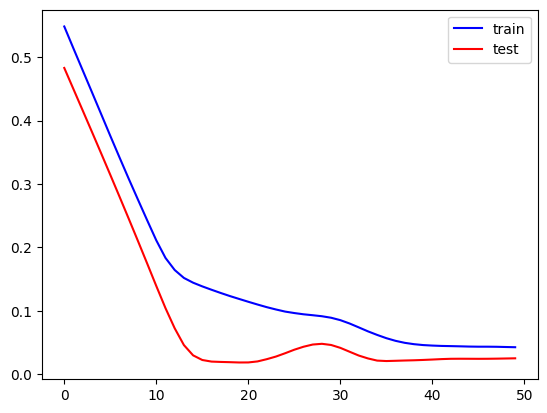

In [ ]:
pyplot.plot(history.history['loss'],color = 'b', label='train')
pyplot.plot(history.history['val_loss'],color = 'r', label='test')
pyplot.legend()
pyplot.show()

##### MAKING PREDICTIONS

In [ ]:
print(test_X.shape)
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[2]))
print(test_X.shape)
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


(22, 1, 12)
(22, 1, 12)
1/1 [==============================] - 1s 733ms/step
Test RMSE: 467.539
